# HW4 - Runner

## Importing Modules and parameters setup

In [1]:
import papermill as pm
import scrapbook as sb
import pandas as pd
import datetime as dt
import sqlite3
import shutil
import os

import matplotlib.pyplot as plt

/Users/tusharjain/opt/miniconda/envs/hw4/lib/python3.9/site-packages/papermill/iorw.py:50: FutureWarning: pyarrow.HadoopFileSystem is deprecated as of 2.0.0, please use pyarrow.fs.HadoopFileSystem instead.
  from pyarrow import HadoopFileSystem


In [2]:
plt.style.use('ggplot')
plt.tight_layout()
plt.rcParams['figure.figsize'] = [20, 20]

%matplotlib inline

In [3]:
db_path = os.path.abspath("../../../Lectures/Lecture 4/data/data.db")
template = 'hw4_template.ipynb'

## Setting up the output directory

In [4]:
base_output_folder = os.path.expanduser('outputs')

if os.path.exists(base_output_folder):
    shutil.rmtree(base_output_folder)

In [5]:
os.makedirs(base_output_folder)

## Initializing Parameters

In [6]:
with sqlite3.connect(db_path) as conn:
    data = pd.read_sql(f'''
    WITH CTE_1 AS(
        SELECT MAX(ts) AS ts
        FROM ohlc
    ),
    CTE_2 AS (
        SELECT DISTINCT token AS token
        FROM ohlc
    )
    SELECT *
    FROM CTE_1
    CROSS JOIN CTE_2;
    ''', conn)

In [7]:
data['ts'] = pd.to_datetime(data['ts']) - dt.timedelta(weeks=2)
data['ts'] = data['ts'].apply(lambda x: x - dt.timedelta(days=x.weekday()))
data['ts'] = data['ts'].dt.strftime('%Y-%m-%d')

In [8]:
data.apply(lambda x: (x.token, x.ts), axis=1)

0      (BTC, 2021-11-29)
1      (ETH, 2021-11-29)
2     (USDT, 2021-11-29)
3      (SOL, 2021-11-29)
4      (ADA, 2021-11-29)
5      (DOT, 2021-11-29)
6     (AVAX, 2021-11-29)
7     (ATOM, 2021-11-29)
8      (CRV, 2021-11-29)
9     (AAVE, 2021-11-29)
10    (COMP, 2021-11-29)
dtype: object

## Executing Notebooks

In [9]:
data.apply(lambda x: pm.execute_notebook(
    template,
    output_path=os.path.join(base_output_folder, f'hw_4_tushar_jain_{x.token}.ipynb'),
    parameters={
        'token':x.token,
        'db_path':db_path,
        'start_date': '2021-11-29'
    },
    progress_bar=False), axis=1)

0     {'cells': [{'cell_type': 'markdown', 'id': 'b9...
1     {'cells': [{'cell_type': 'markdown', 'id': 'b9...
2     {'cells': [{'cell_type': 'markdown', 'id': 'b9...
3     {'cells': [{'cell_type': 'markdown', 'id': 'b9...
4     {'cells': [{'cell_type': 'markdown', 'id': 'b9...
5     {'cells': [{'cell_type': 'markdown', 'id': 'b9...
6     {'cells': [{'cell_type': 'markdown', 'id': 'b9...
7     {'cells': [{'cell_type': 'markdown', 'id': 'b9...
8     {'cells': [{'cell_type': 'markdown', 'id': 'b9...
9     {'cells': [{'cell_type': 'markdown', 'id': 'b9...
10    {'cells': [{'cell_type': 'markdown', 'id': 'b9...
dtype: object

## Capturing data from the notebooks

In [10]:
nb = sb.read_notebooks(base_output_folder)

In [11]:
df = pd.concat([nb[notebook].scraps['result'].data.T for notebook in nb], axis=0)
df

,avg_return,avg_volatility,max_drawdown,range
AAVE,-0.079399,0.230676,38.2970,-69.9550
ADA,-0.047296,0.239855,0.1568,-0.3348
ATOM,-0.043236,0.324583,5.2400,-5.7560
AVAX,-0.042591,0.316457,13.6200,-24.0700
BTC,-0.036921,0.165808,8275.8600,-9098.0800
COMP,-0.102179,0.245184,34.6000,-102.6600
CRV,-0.076450,0.357290,0.7467,-1.4962
DOT,-0.063969,0.269137,5.0100,-9.7550
ETH,-0.020862,0.192578,463.8000,-460.3500
SOL,-0.046766,0.269974,22.3990,-41.5570


In [12]:
%%capture

fig, ax = plt.subplots(2,2,figsize=(20,20))

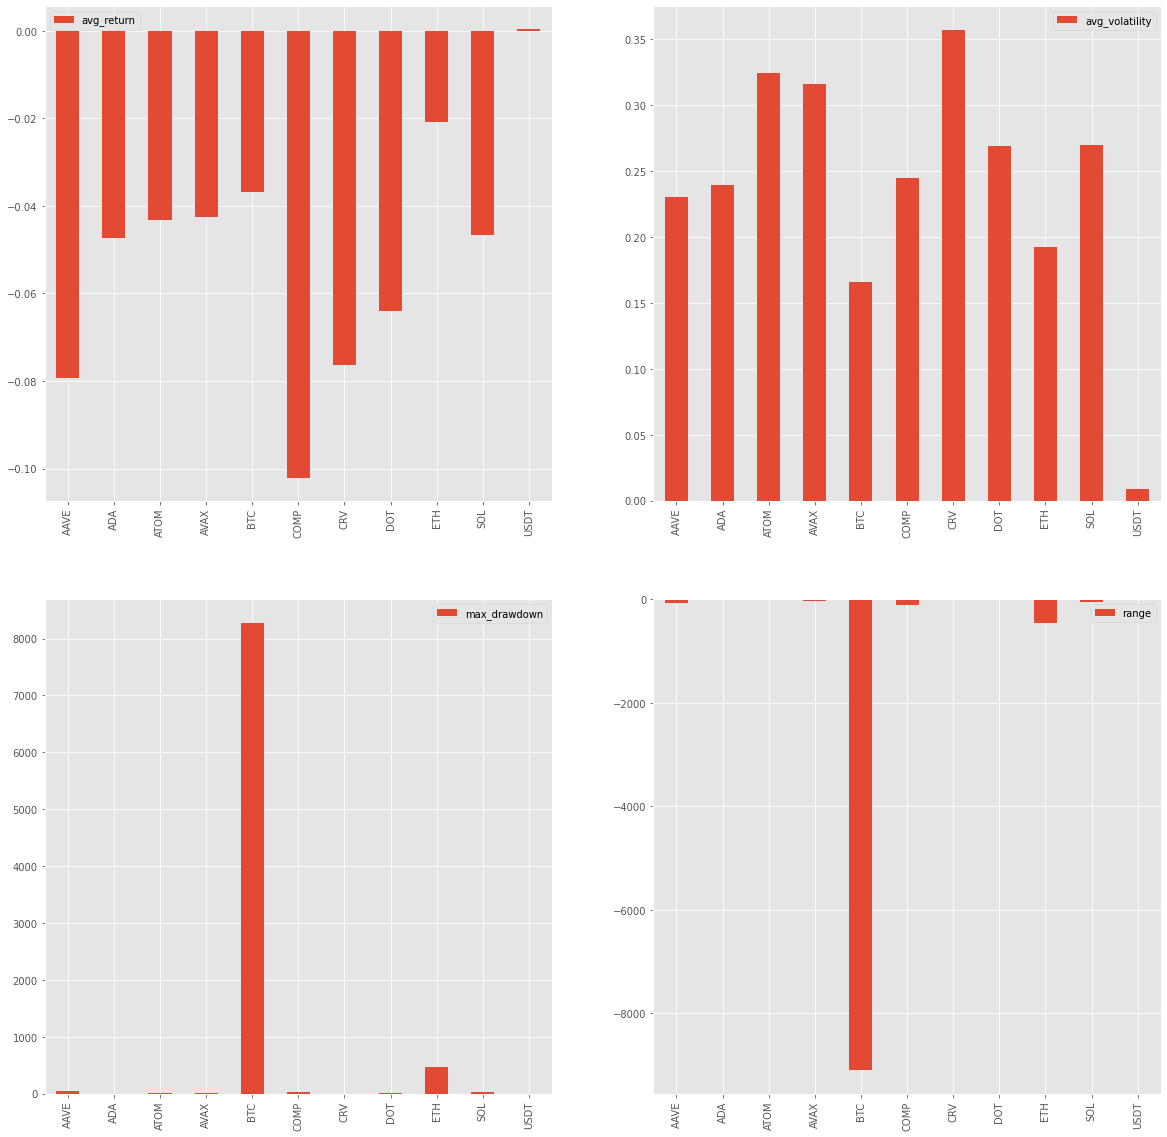

In [13]:
for idx, col in enumerate(df.columns):
    ax[idx//2, idx%2].clear()
    df[[col]].plot(ax=ax[idx//2, idx%2], kind='bar')

fig